In [ ]:
#Saved as .h5

[*********************100%%**********************]  1 of 1 completed


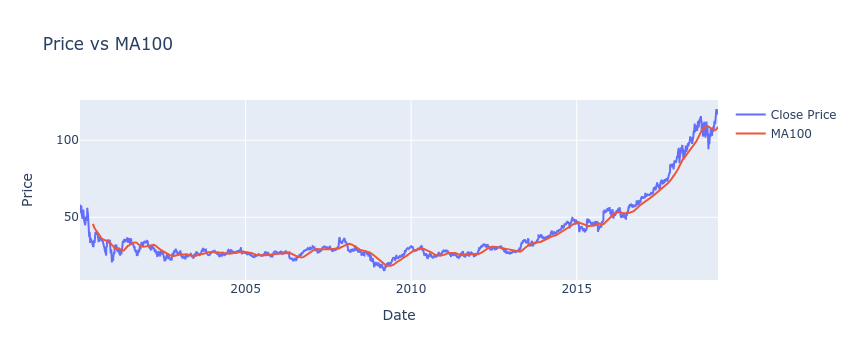

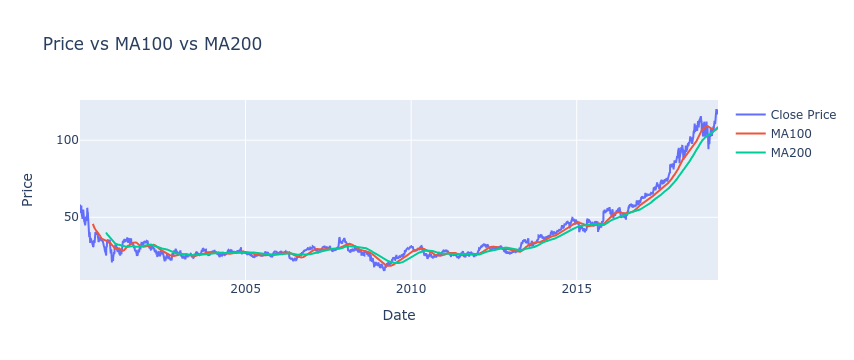

x_train.shape => (4746, 100)

x_train.shape[1] => 100


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
Mean Absolute Error (MAE): 12.426230725624578
Mean Squared Error (MSE): 237.90362000133442


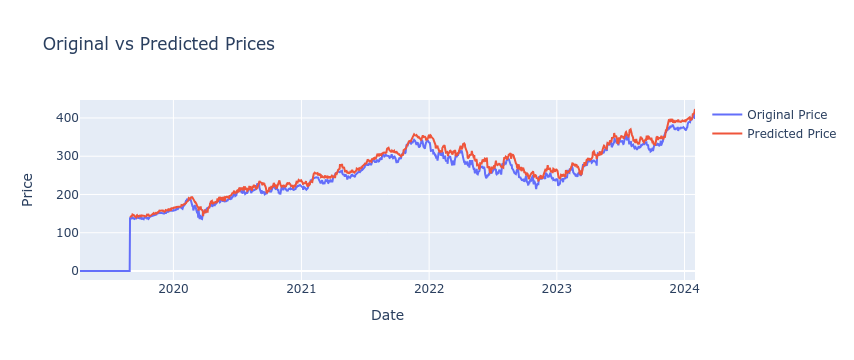

In [10]:
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import h5py

# Define stock data retrieval parameters
start_date = '2000-01-01'
end_date = '2024-02-01'
stock_symbol = 'MSFT'

# Download stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset index and drop missing values
data.reset_index(inplace=True)
data.dropna(inplace=True)

# Calculate moving averages
data['MA100'] = data['Close'].rolling(100).mean()
data['MA200'] = data['Close'].rolling(200).mean()

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Plot Price vs MA100
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=train_data['Date'], y=train_data['Close'], mode='lines', name='Close Price'))
fig1.add_trace(go.Scatter(x=train_data['Date'], y=train_data['MA100'], mode='lines', name='MA100'))
fig1.update_layout(title='Price vs MA100',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig1.show()

# Plot Price vs MA100 vs MA200
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=train_data['Date'], y=train_data['Close'], mode='lines', name='Close Price'))
fig2.add_trace(go.Scatter(x=train_data['Date'], y=train_data['MA100'], mode='lines', name='MA100'))
fig2.add_trace(go.Scatter(x=train_data['Date'], y=train_data['MA200'], mode='lines', name='MA200'))
fig2.update_layout(title='Price vs MA100 vs MA200',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig2.show()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data[['Close']])
test_scaled = scaler.transform(test_data[['Close']])

# Prepare training and test sets
def create_dataset(data, look_back=100):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train_scaled)
x_test, y_test = create_dataset(test_scaled)

# Train the KNN model
print(f"x_train.shape => {x_train.shape}\n")
print(f"x_train.shape[1] => {x_train.shape[1]}\n")

k = 5  # Number of neighbors
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
# model.add(Dense(100, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

# Save the trained model as .h5 file
model.save('KNN_model.h5')

# Predictions on test set
y_pred = model.predict(x_test)

# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Pad y_test with zeros to match the length of test_data['Date']
y_test_padded = np.concatenate((np.zeros((100, 1)), y_test))

# Plot original vs predicted prices using Plotly
fig3 = go.Figure()

fig3.add_trace(go.Scatter(x=test_data['Date'], y=y_test_padded.flatten(), mode='lines', name='Original Price'))
fig3.add_trace(go.Scatter(x=test_data['Date'].iloc[100:], y=y_pred.flatten(), mode='lines', name='Predicted Price'))

fig3.update_layout(title='Original vs Predicted Prices',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig3.show()


In [ ]:
#saved as .keras

[*********************100%%**********************]  1 of 1 completed


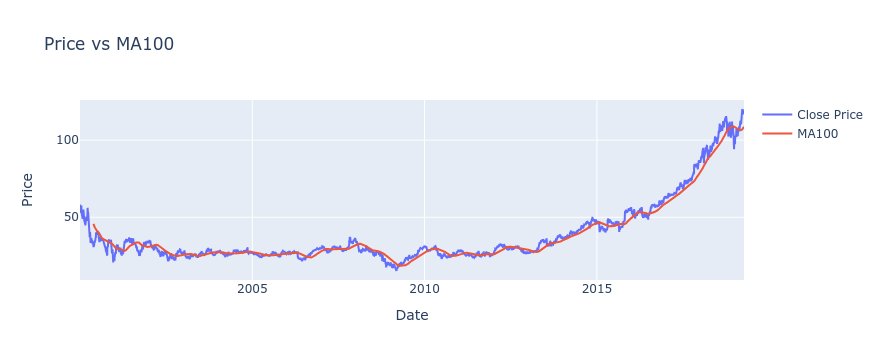

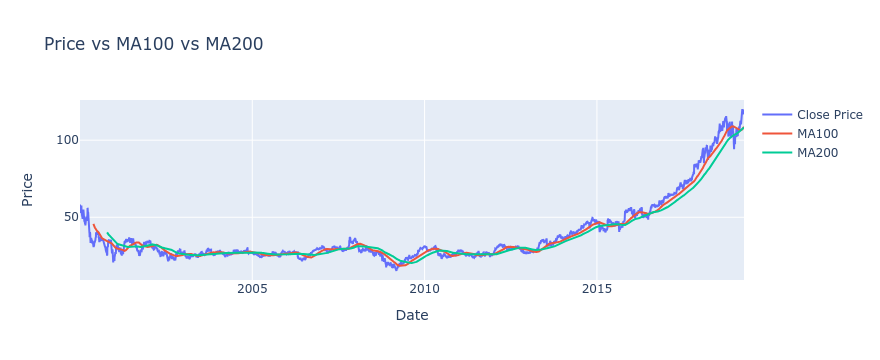

/mnt/sdb1/2ndHome/anaconda3/envs/kaggle/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
Mean Absolute Error (MAE): 6.137461243773536
Mean Squared Error (MSE): 62.79992449540174


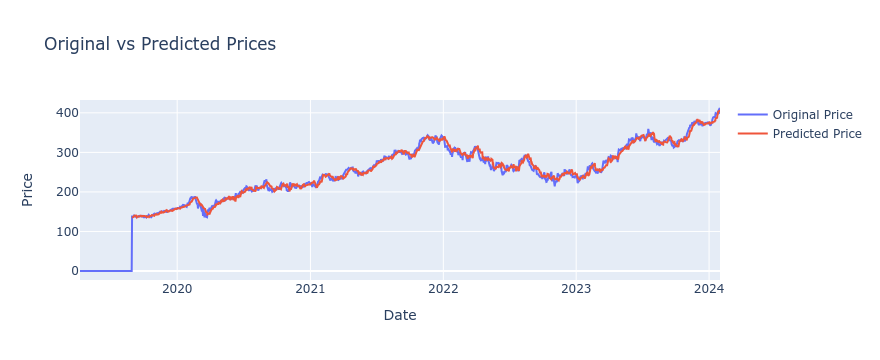

In [3]:
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define stock data retrieval parameters
start_date = '2000-01-01'
end_date = '2024-02-01'
stock_symbol = 'MSFT'

# Download stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset index and drop missing values
data.reset_index(inplace=True)
data.dropna(inplace=True)

# Calculate moving averages
data['MA100'] = data['Close'].rolling(100).mean()
data['MA200'] = data['Close'].rolling(200).mean()

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Plot Price vs MA100
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=train_data['Date'], y=train_data['Close'], mode='lines', name='Close Price'))
fig1.add_trace(go.Scatter(x=train_data['Date'], y=train_data['MA100'], mode='lines', name='MA100'))
fig1.update_layout(title='Price vs MA100',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig1.show()

# Plot Price vs MA100 vs MA200
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=train_data['Date'], y=train_data['Close'], mode='lines', name='Close Price'))
fig2.add_trace(go.Scatter(x=train_data['Date'], y=train_data['MA100'], mode='lines', name='MA100'))
fig2.add_trace(go.Scatter(x=train_data['Date'], y=train_data['MA200'], mode='lines', name='MA200'))
fig2.update_layout(title='Price vs MA100 vs MA200',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig2.show()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data[['Close']])
test_scaled = scaler.transform(test_data[['Close']])

# Prepare training and test sets
def create_dataset(data, look_back=100):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train_scaled)
x_test, y_test = create_dataset(test_scaled)

# Train the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

# Save the trained model as .keras file
model.save('KNN_model.keras')

# Predictions on test set
y_pred = model.predict(x_test)

# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Pad y_test with zeros to match the length of test_data['Date']
y_test_padded = np.concatenate((np.zeros((100, 1)), y_test))

# Plot original vs predicted prices using Plotly
fig3 = go.Figure()

fig3.add_trace(go.Scatter(x=test_data['Date'], y=y_test_padded.flatten(), mode='lines', name='Original Price'))
fig3.add_trace(go.Scatter(x=test_data['Date'].iloc[100:], y=y_pred.flatten(), mode='lines', name='Predicted Price'))

fig3.update_layout(title='Original vs Predicted Prices',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig3.show()
